**Import libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


**Read data sets**

In [4]:
train_df = pd.read_csv('../Data/train_ctrUa4K.csv')
train_df.drop(columns=['Loan_ID'], inplace=True)
test_df = pd.read_csv('../Data/test_lAUu6dG.csv')
test_df.drop(columns=['Loan_ID'], inplace=True)
test_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [5]:
train_df.shape

(614, 12)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [7]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
train_df.isnull().sum(),test_df.isnull().sum()



(Gender               13
 Married               3
 Dependents           15
 Education             0
 Self_Employed        32
 ApplicantIncome       0
 CoapplicantIncome     0
 LoanAmount           22
 Loan_Amount_Term     14
 Credit_History       50
 Property_Area         0
 Loan_Status           0
 dtype: int64,
 Gender               11
 Married               0
 Dependents           10
 Education             0
 Self_Employed        23
 ApplicantIncome       0
 CoapplicantIncome     0
 LoanAmount            5
 Loan_Amount_Term      6
 Credit_History       29
 Property_Area         0
 dtype: int64)

In [9]:
# Categorical columns
categorical_cols = train_df.select_dtypes(include=['object']).columns

# numeric columns
numeric_cols = train_df.select_dtypes(exclude=['object']).columns
categorical_cols, numeric_cols

(Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
        'Property_Area', 'Loan_Status'],
       dtype='object'),
 Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History'],
       dtype='object'))

In [10]:
# get unique values in categorical columns
for col in categorical_cols:
    print(f"{col}: {train_df[col].unique()}")
    

Gender: ['Male' 'Female' nan]
Married: ['No' 'Yes' nan]
Dependents: ['0' '1' '2' '3+' nan]
Education: ['Graduate' 'Not Graduate']
Self_Employed: ['No' 'Yes' nan]
Property_Area: ['Urban' 'Rural' 'Semiurban']
Loan_Status: ['Y' 'N']


In [11]:
train_df.isnull().any(),test_df.isnull().any()

(Gender                True
 Married               True
 Dependents            True
 Education            False
 Self_Employed         True
 ApplicantIncome      False
 CoapplicantIncome    False
 LoanAmount            True
 Loan_Amount_Term      True
 Credit_History        True
 Property_Area        False
 Loan_Status          False
 dtype: bool,
 Gender                True
 Married              False
 Dependents            True
 Education            False
 Self_Employed         True
 ApplicantIncome      False
 CoapplicantIncome    False
 LoanAmount            True
 Loan_Amount_Term      True
 Credit_History        True
 Property_Area        False
 dtype: bool)

In [12]:
# fill missing values in categorical columns with mode
missing_value_cols = train_df.columns[train_df.isnull().any()].tolist()
# Fill missing values in numeric columns with mean
for col in missing_value_cols:
    train_df[col].fillna(train_df[col].mode()[0], inplace=True)
    test_df[col].fillna(test_df[col].mode()[0], inplace=True)

C:\Users\kanch\AppData\Local\Temp\ipykernel_17524\3269351182.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_df[col].mode()[0], inplace=True)
C:\Users\kanch\AppData\Local\Temp\ipykernel_17524\3269351182.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [13]:
train_df.isnull().sum(),test_df.isnull().sum()

(Gender               0
 Married              0
 Dependents           0
 Education            0
 Self_Employed        0
 ApplicantIncome      0
 CoapplicantIncome    0
 LoanAmount           0
 Loan_Amount_Term     0
 Credit_History       0
 Property_Area        0
 Loan_Status          0
 dtype: int64,
 Gender               0
 Married              0
 Dependents           0
 Education            0
 Self_Employed        0
 ApplicantIncome      0
 CoapplicantIncome    0
 LoanAmount           0
 Loan_Amount_Term     0
 Credit_History       0
 Property_Area        0
 dtype: int64)

In [14]:
train_df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [15]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Univariate Analysis**

In [16]:
train_df.Loan_Status

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

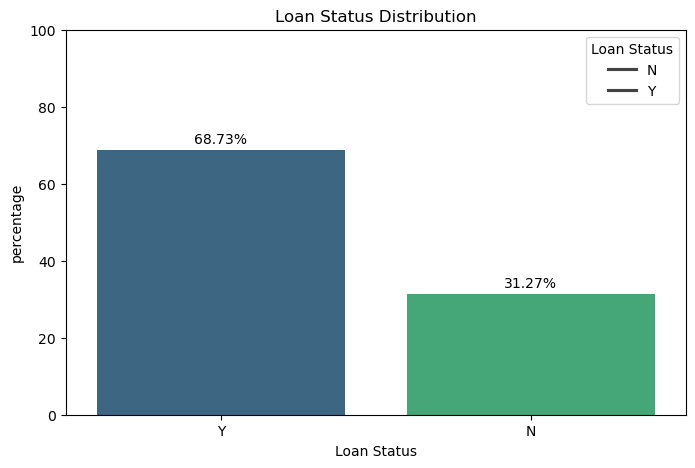

In [17]:
# Plot the loan status distribution
plt.figure(figsize=(8, 5))
percentages = train_df['Loan_Status'].value_counts(normalize=True) * 100
sns.barplot(x=percentages.index, y=percentages.values, palette='viridis',hue=percentages.index)
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('percentage')
plt.legend(title='Loan Status', loc='upper right', labels=['N', 'Y'])
plt.ylim(0, 100)  # Set y-axis limit to 100%
plt.xticks(ticks=range(len(percentages.index)), labels=percentages.index, rotation=0)
# Add percentage labels on top of the bars
for i, v in enumerate(percentages.values):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', va='bottom', fontsize=10)
plt.show()



- 69% of applicants were approved
- 31% were not approved

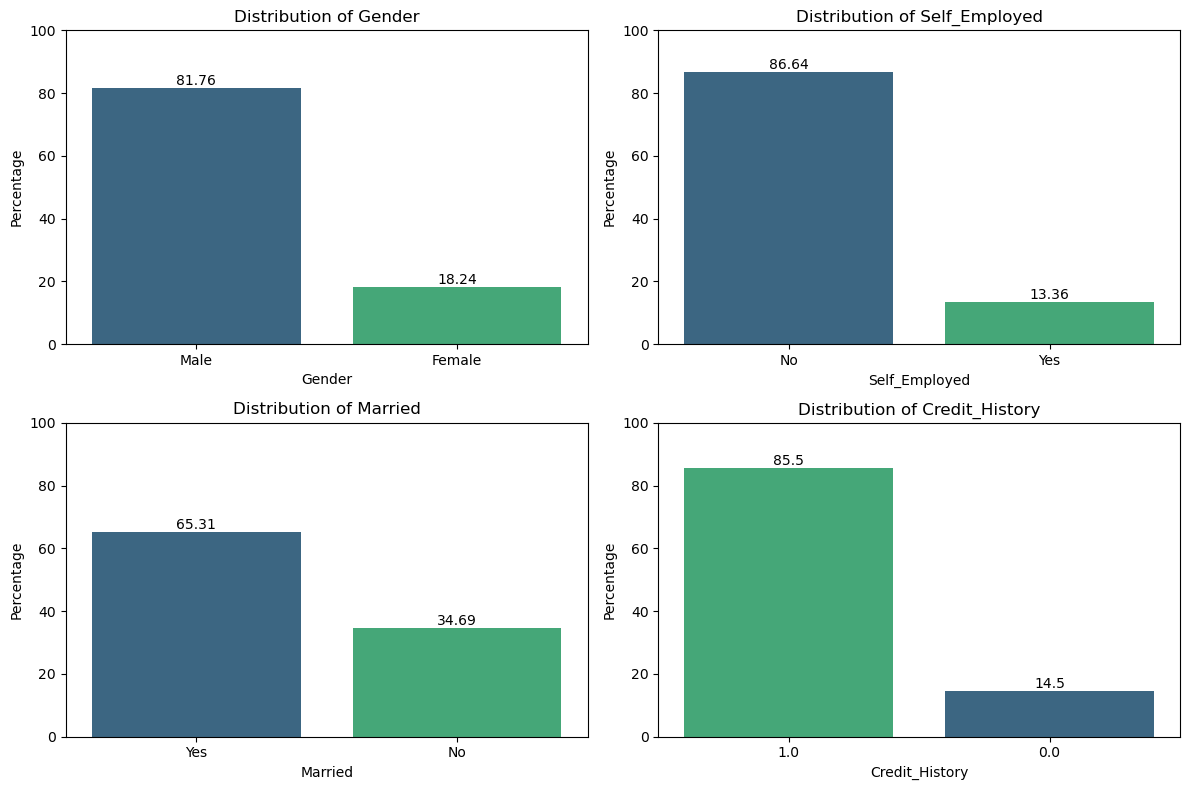

In [18]:
categories = ['Gender', 'Self_Employed', 'Married','Credit_History']
# Plot 
# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
# Flatten the axes array for easy iteration
axes = axes.flatten()
# Loop through each category and plot
for i, category in enumerate(categories):
    # Count the occurrences of each category value
    counts = round(train_df[category].value_counts()*100 / len(train_df[category]), 2)
    # Plot the bar chart
    sns.barplot(x=counts.index.astype(str), y=counts.values, ax=axes[i], palette='viridis',hue=counts.index,legend=False)
    # Set title and labels
    axes[i].set_title(f'Distribution of {category}')
    axes[i].set_xlabel(category)
    axes[i].set_ylabel('Percentage')
    axes[i].set_ylim(0, 100)  # Set y-axis limit to 0-100%
    # Set x-ticks to be the range of the number of categories
    axes[i].set_xticks(np.arange(len(counts.index)))
    axes[i].set_xticklabels(counts.index, rotation=0)
    # Add value labels on top of the bars
    for j, value in enumerate(counts.values):
        axes[i].text(j, value, str(value), ha='center', va='bottom')
# Adjust layout
plt.tight_layout()
plt.show()


1. Category = Gender
    - Nearly 80% of applicatns are men,20% of aplicants are female
    - Indicates a gender imbalance in the dataset, It may affect fairness in model outcomes
2. Category = Self_Employed
    - Around 82% of applicants are not Self-employeed, and only ~18 are.
    - Indicates a significant imbalance in the dataset, which may affect the model's fairness and accuracy.
3. Category = Married
    - ~65% of applicants are married and ~35 are not
    - Indicates a moderate imbalance in the dataset, which may affect the model's fairness and accuracy.
4. Category = Credit_History
    - ~80% of applicants have a good credit history(1.0),while ~ 20% have no/poor credit history(0.0)
    - This feature likely has high preditive power for loan approval


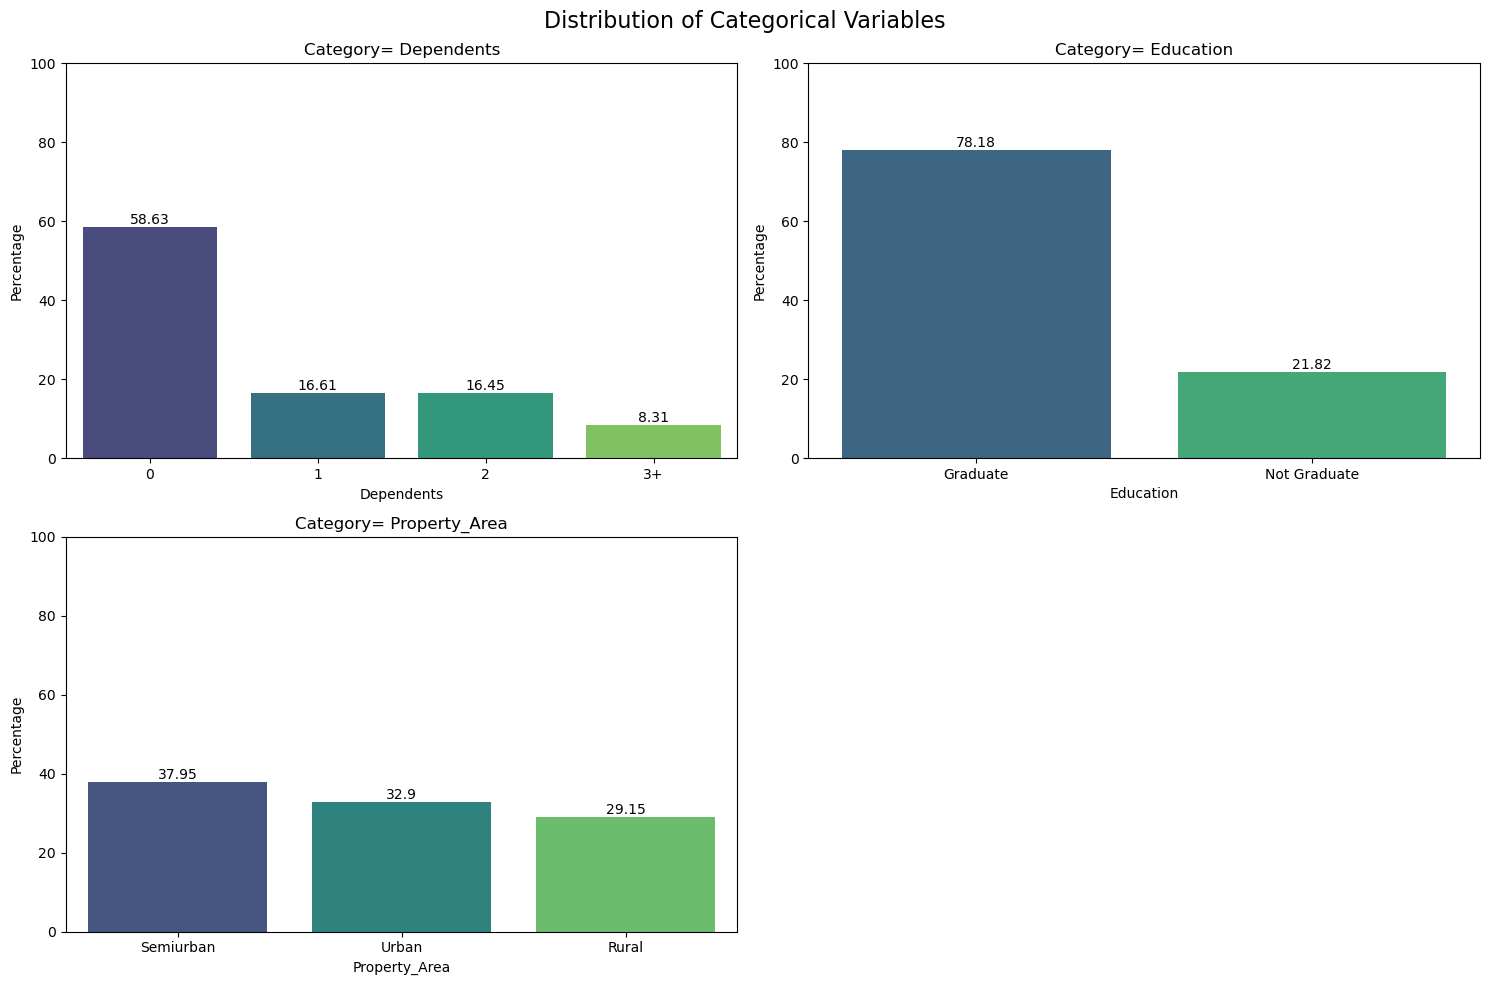

In [19]:
category = ['Dependents', 'Education', 'Property_Area']
# Plot
# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
# Flatten the axes array for easy iteration
axes = axes.flatten()
# Loop through each category and plot only the first three subplots
for i, category in enumerate(category):
    percentages = train_df[category].value_counts(normalize=True) * 100
    # Plot the bar chart
    sns.barplot(x=percentages.index.astype(str), y=percentages.values, ax=axes[i], palette='viridis', hue=percentages.index.astype(str))
    # Set title and labels
    axes[i].set_title(f'Category= {category}')
    axes[i].set_xlabel(category)
    axes[i].set_ylabel('Percentage')
    axes[i].set_ylim(0, 100)  # Set y-axis limit to 0-100%
    # Set x-ticks to be the range of the number of categories   
    axes[i].set_xticks(np.arange(len(percentages.index)))
    axes[i].set_xticklabels(percentages.index, rotation=0)
    # Add value labels on top of the bars
    for j, value in enumerate(percentages.values):
        axes[i].text(j, value, str(round(value, 2)), ha='center', va='bottom')
# Add a title for the entire figure
    fig.suptitle('Distribution of Categorical Variables', fontsize=16)   
# Hide the last subplot (4th one) since we have only 3 categories
fig.delaxes(axes[3])     
# Adjust layout
plt.tight_layout()
plt.show()

1. Category = Dependents
    - Majority i.e 57% have 0 dependents.
    - 17% have 1 or 2 dependents.
    - less than 10 % have 3 or more dependents.
    - **Insight**: The dataset leans toward applicats without dependents, this might influence loan approval likelihood.
2. Category = Education
    - Roughly 80% are Graduates
    - 20% are not Graduates
    - **Insight**: Clear dominance of graduates in the dataset, education level might correlate with income or credit history.
3. Category = Property_Area
    - Fairly balnced distribution:
        - Semiurban slightly leads (38%)
        - Urban (33%)
        - Rural (29%)
        - **Insights**: A diverse representation across locations, good for generalizablility in modeling.

2. **Numerical**

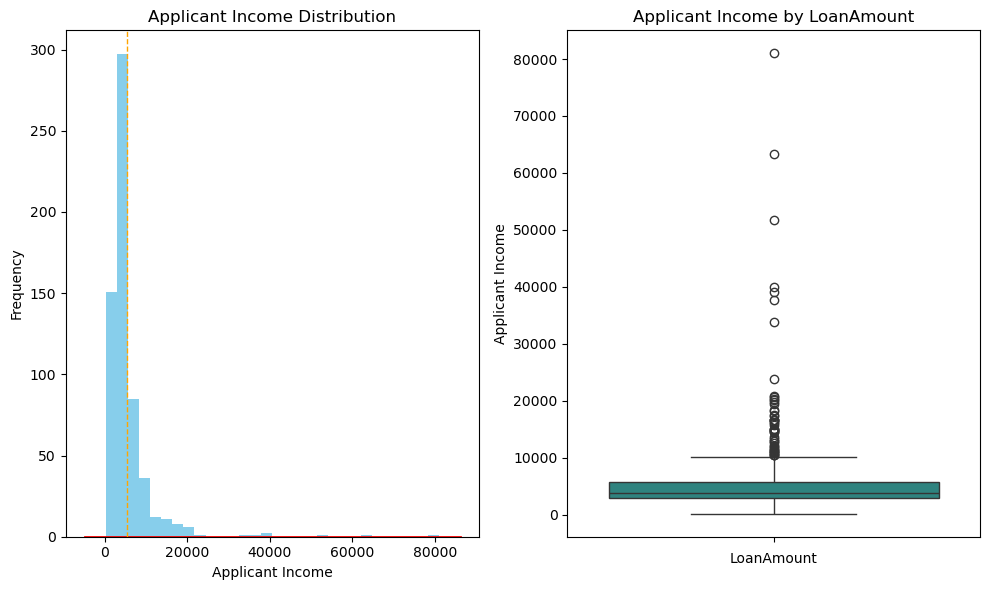

In [20]:
plt.figure(figsize=(10, 6))
# Histogram of ApplicantIncome
plt.subplot(1, 2, 1)
plt.hist(train_df['ApplicantIncome'], bins=30, color='skyblue')
# Draw distribution line
sns.kdeplot(train_df['ApplicantIncome'], color='red', lw=2)
plt.axvline(train_df['ApplicantIncome'].mean(), color='orange', linestyle='dashed', linewidth=1, label='Mean')


plt.title('Applicant Income Distribution')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')

# Boxplot of ApplicantIncome by Loan_Status
plt.subplot(1, 2, 2)
sns.boxplot(y=train_df['ApplicantIncome'], palette='viridis',hue=False, legend=False)
plt.title('Applicant Income by LoanAmount')
plt.xlabel('LoanAmount')
plt.ylabel('Applicant Income')
plt.tight_layout()
plt.show()


sns.histplot() – Histogram

- Shows right-skewed distribution (long tail on the right).

- Most applicants have income below ₹10,000–₹15,000.

- A few outliers go as high as ₹80,000+.

sns.boxplot() – Boxplot
- Reveals outliers in the income range — especially above ₹25,000.

- The median income lies close to the bottom of the box, suggesting a positively skewed distribution.

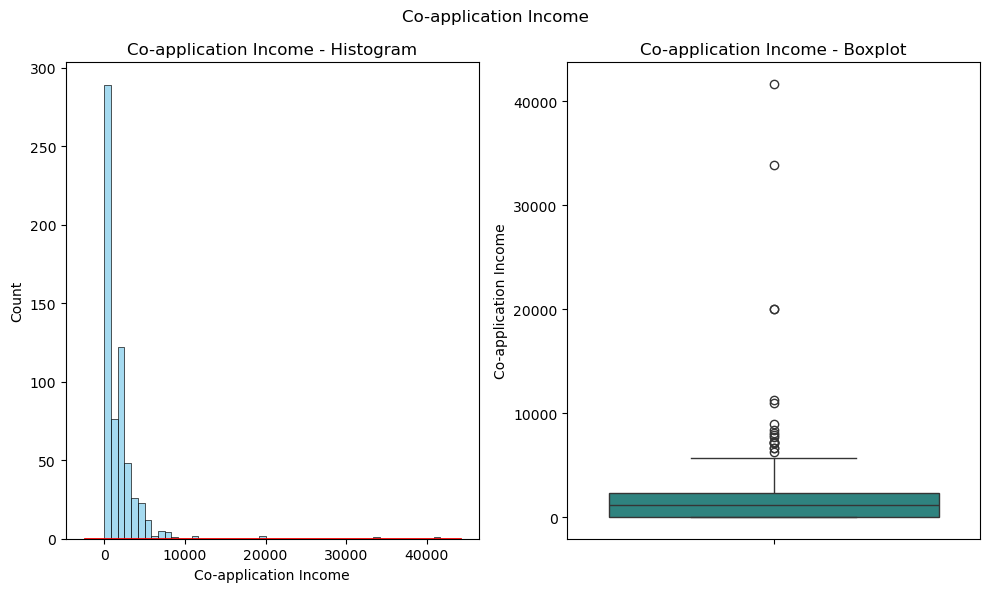

In [21]:
# Co applicant income
plt.figure(figsize=(10, 6))
# Histogram of CoapplicantIncome
plt.subplot(1, 2, 1)
sns.histplot(train_df['CoapplicantIncome'], bins=50, color='skyblue',)
# Overlay kde seperately 
sns.kdeplot(train_df['CoapplicantIncome'], color='red',lw=2)
plt.title('Co-application Income - Histogram')
plt.xlabel('Co-application Income')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=train_df['CoapplicantIncome'],palette='viridis',hue=False, legend=False)
plt.title('Co-application Income - Boxplot')
plt.ylabel('Co-application Income')

plt.suptitle('Co-application Income')
plt.tight_layout()
plt.show()




- Histogram
    - The distribution is highly right-skewed, even more than Applicant Income.

    - A large number of co-applicants have zero or low income (peaking around 0–2,000).

    - Very few instances have higher values.

– Boxplot

    - Shows a significant number of outliers above ₹10,000, with some extreme values up to ₹40,000+.

    - The IQR (interquartile range) is quite narrow — most co-applicant incomes are concentrated at the lower end.

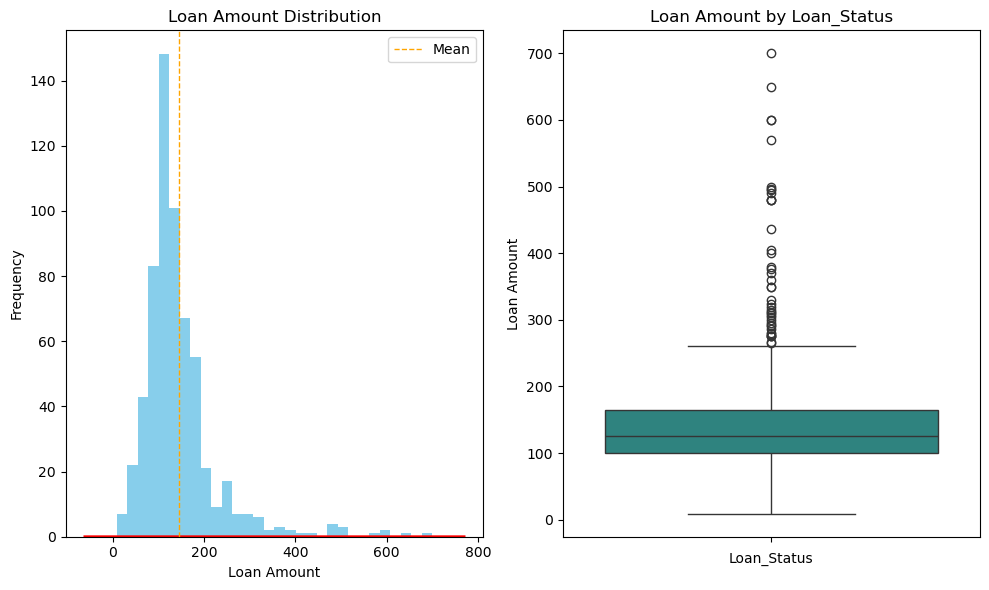

In [22]:
# Loan amount
plt.figure(figsize=(10, 6))
# Histogram of LoanAmount
plt.subplot(1, 2, 1)
plt.hist(train_df['LoanAmount'], bins=30, color='skyblue')
# Draw distribution line
sns.kdeplot(train_df['LoanAmount'], color='red', lw=2)
plt.axvline(train_df['LoanAmount'].mean(), color='orange', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Loan Amount Distribution')   
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.legend()
# Boxplot of LoanAmount by Loan_Status
plt.subplot(1, 2, 2)
sns.boxplot(y=train_df['LoanAmount'], palette='viridis',hue=False, legend=False)        
plt.title('Loan Amount by Loan_Status')
plt.xlabel('Loan_Status')
plt.ylabel('Loan Amount')
plt.tight_layout()
plt.show()

- **Histogram shows**:

    - Most loan amounts fall between 50 to 250 units.

    - Distribution is right-skewed, with a few very large loan values.

- **Orange dashed line** indicates the mean loan amount, visually highlighting how the data skews to the right of the mean.

- **The boxplot shows**:

    - Loan amounts tend to be higher for approved loans (Loan_Status = Y).

    - A large number of outliers exist, with values above 300 and even crossing 700.

    - The median is around 125–150, which aligns with the histogram.

## **Bivariate Analysis** 

1 **Distribution over categories**

 we are intresed in answering questions like:
 - There's a relationship between Gender and Applicant Income?
 - These's a relationship between Eduction level and Applicant Income?


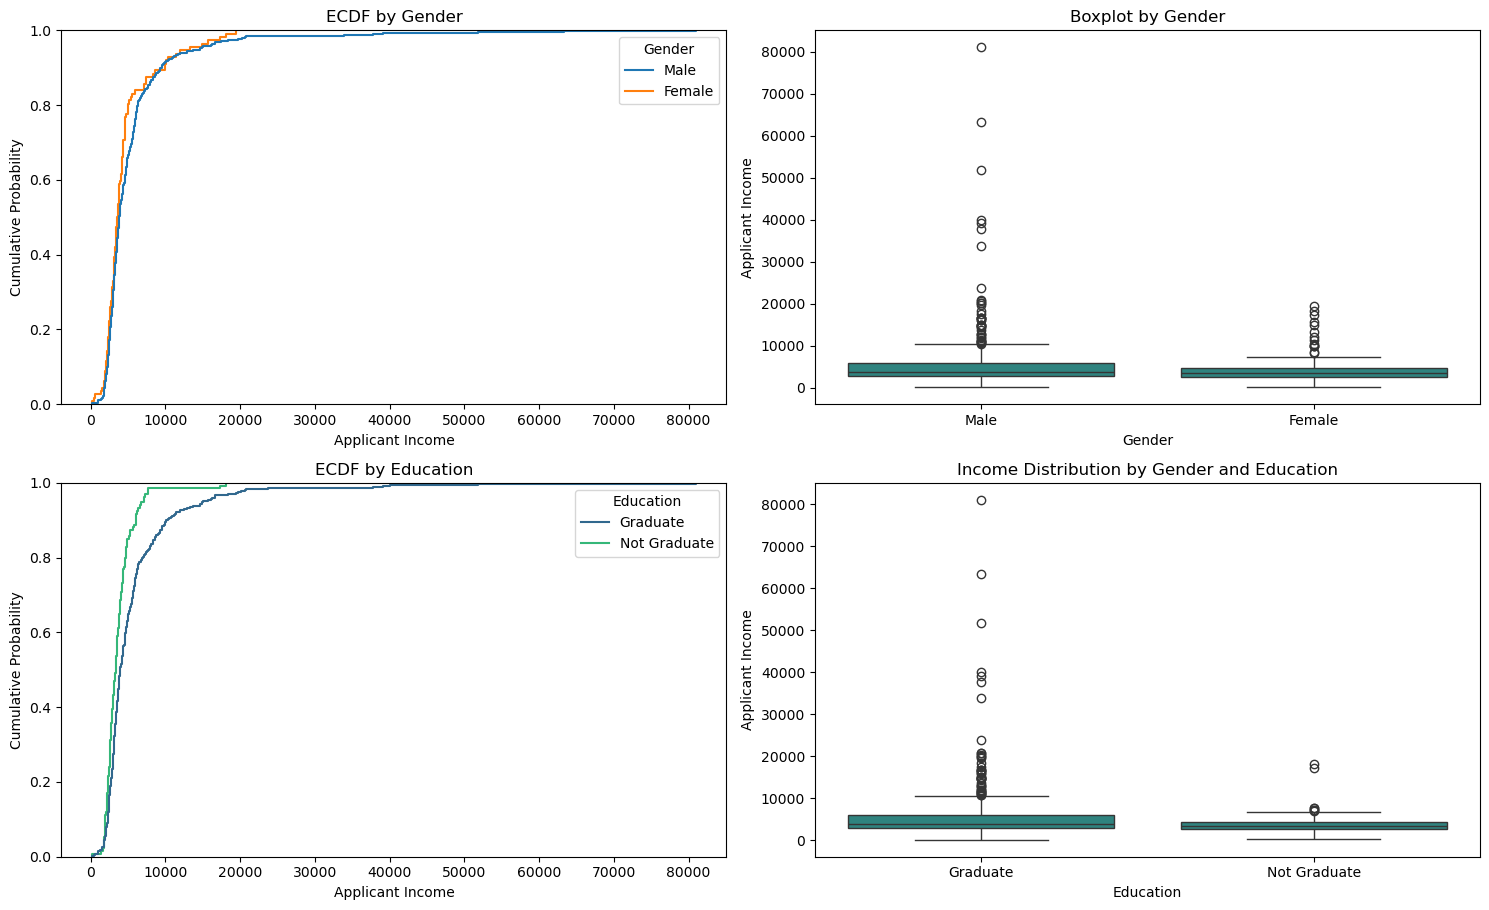

In [23]:
fig, axes = plt.subplots(2,2, figsize=(15, 10))
# Flatten the axes array for easy iteration
axes = axes.flatten()
# Top row: Gender
plt.subplot(2, 2, 1)
sns.ecdfplot(data=train_df, x='ApplicantIncome', hue='Gender')
plt.title('ECDF by Gender')
plt.xlabel('Applicant Income')
plt.ylabel('Cumulative Probability')

plt.subplot(2, 2, 2)
sns.boxplot(data=train_df, x='Gender', y='ApplicantIncome',palette='viridis',hue=False, legend=False)
plt.title('Boxplot by Gender')
plt.xlabel('Gender')
plt.ylabel('Applicant Income')

# Bottom row: Education
plt.subplot(2, 2, 3)
sns.ecdfplot(data=train_df, x='ApplicantIncome', hue='Education', palette='viridis')
plt.title('ECDF by Education')
plt.xlabel('Applicant Income')
plt.ylabel('Cumulative Probability')

plt.subplot(2, 2, 4)
sns.boxplot(data=train_df, x='Education', y='ApplicantIncome', palette='viridis',hue=False, legend=False)   
plt.title('Boxplot by Education')
plt.xlabel('Education')
plt.ylabel('Applicant Income')

# Set a common title for the entire figure
plt.title('Income Distribution by Gender and Education')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
plt.show()



**Gender** 

- ECDF:
    - Both Male and Female income distributions are very similar.
    - Slight skew towards higher income in males.
- Boxplot:
    - Males have a slightly wider range and more upper outliers than females.
- **Gender** doesn’t cause major shifts in income, but males slightly edge out in higher extremes.

**Education**
- ECDF:
    - Graduates have a more stretched income distribution.

    - Non-Graduates reach the maximum income level slightly earlier, indicating fewer very high incomes.

- Boxplot:
    - Graduates tend to have higher income outliers and a wider range.

    - Median income appears slightly higher for graduates.
- **Education** level impacts income more significantly — graduates generally earn more and have more income variance.

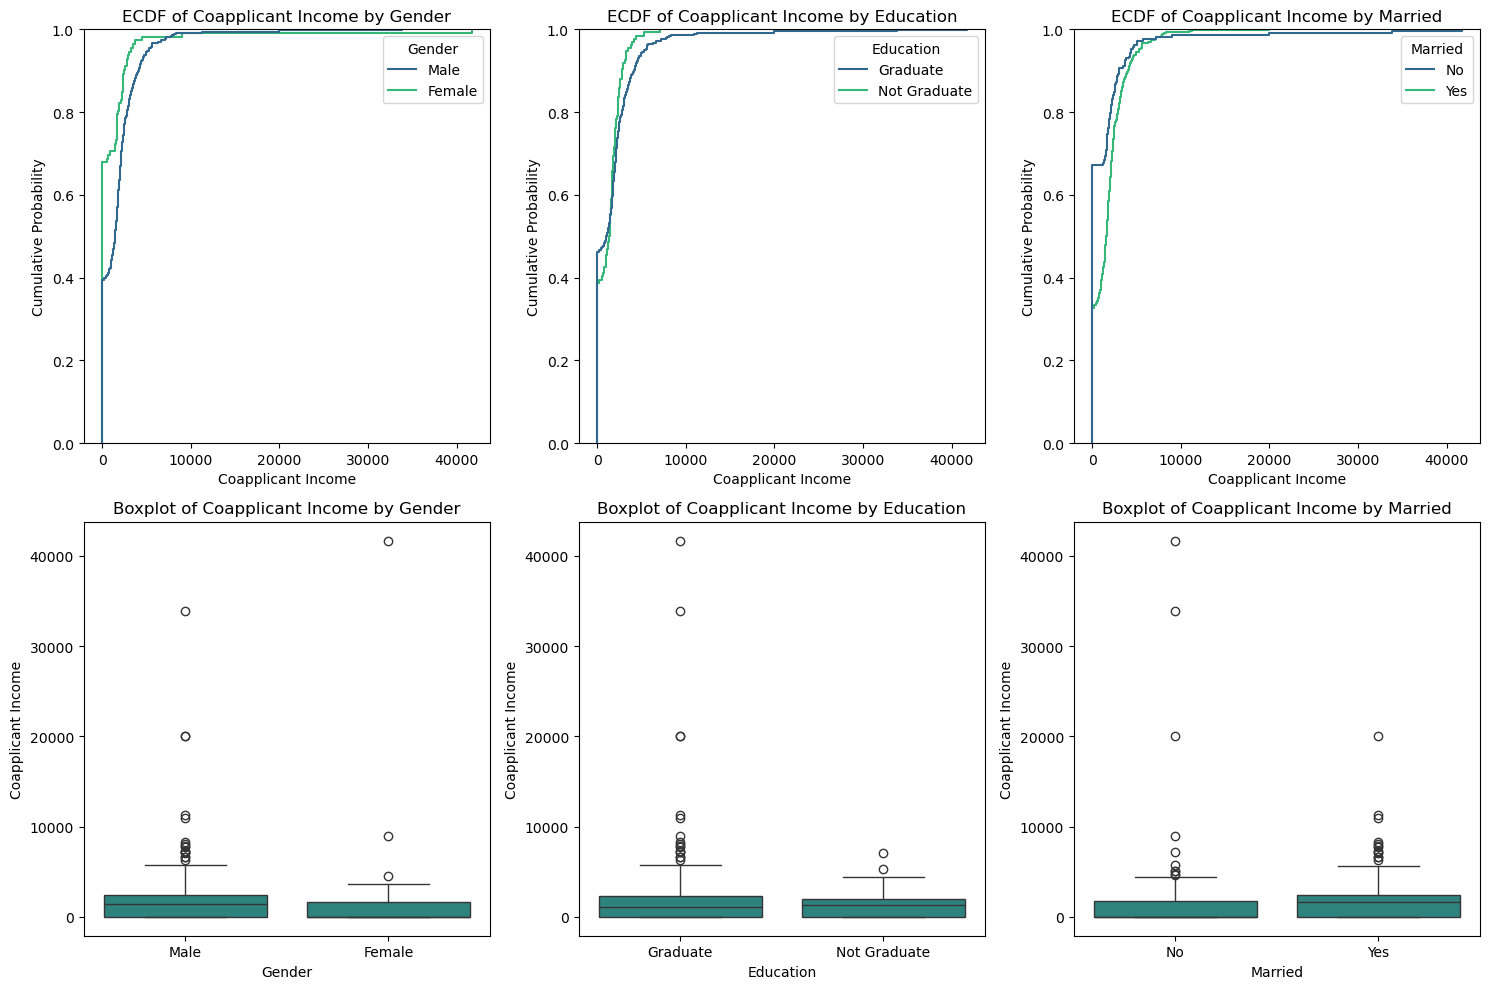

In [24]:
# who is more likely to have a co-applicant, men or women, grduate or not, married or not?
fig, axes = plt.subplots(2,3, figsize=(15, 10))
# Flatten the axes array for easy iteration
axes = axes.flatten()

columns = ['Gender', 'Education', 'Married']
# Loop through each column and plotthe corresponding ECDF and boxplot
for i, column in enumerate(columns):
    # ECDF plot
    plt.subplot(2,3,i+1)  # Adjust the subplot index for the ECDF
    sns.ecdfplot(data=train_df, x='CoapplicantIncome', hue=column, palette='viridis')
    axes[i].set_title(f'ECDF of Coapplicant Income by {column}')
    axes[i].set_xlabel('Coapplicant Income')
    axes[i].set_ylabel('Cumulative Probability')
    
    # Boxplot
    plt.subplot(2,3,i+4)  # Adjust the subplot index for the boxplot
    # Boxplot of CoapplicantIncome by the column
    # Use the same axes for the boxplot
    sns.boxplot(data=train_df, x=column, y='CoapplicantIncome', palette='viridis', hue=False, legend=False)
    plt.title(f'Boxplot of Coapplicant Income by {column}')
    plt.xlabel(column)
    plt.ylabel('Coapplicant Income')
plt.tight_layout()
# Plot the bar chart for each group



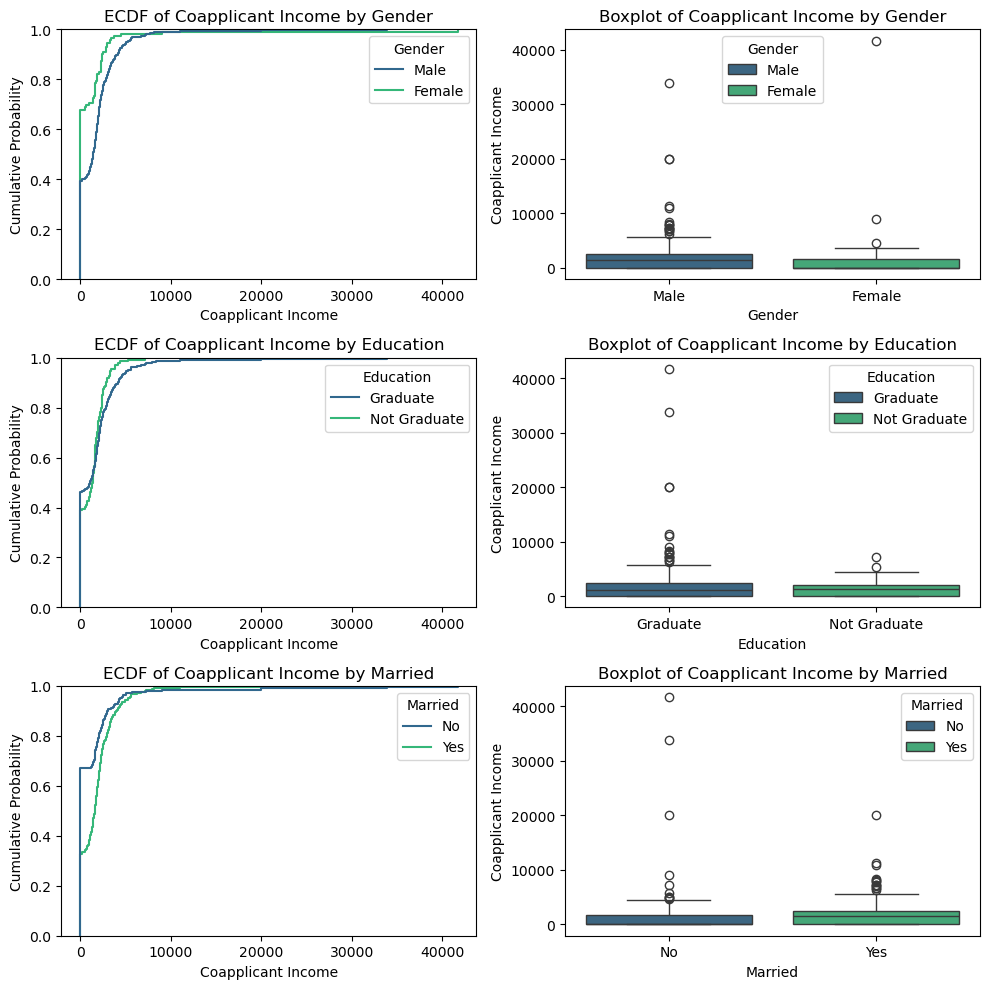

In [25]:
# I Wnat both the ECDF and boxplot for the same row for to have a co-applicant, men or women, grduate or not, married or not
# Create a figure with subplots

fig, axes = plt.subplots(3, 2, figsize=(10, 10))
# Flatten the axes array for easy iteration
axes = axes.flatten()
columns = ['Gender', 'Education', 'Married']

# Loop through each column and plot the corresponding ECDF and boxplot
for i, column in enumerate(columns):
    # Plot the ECDF for the current column
    sns.ecdfplot(data=train_df, x='CoapplicantIncome', hue=column, palette='viridis', ax=axes[i*2])
    axes[i*2].set_title(f'ECDF of Coapplicant Income by {column}')
    axes[i*2].set_xlabel('Coapplicant Income')
    axes[i*2].set_ylabel('Cumulative Probability')
    
    # Plot the boxplot for the current column
    sns.boxplot(data=train_df, x=column, y='CoapplicantIncome', ax=axes[i*2+1], palette='viridis',hue=column, legend=True)
    axes[i*2+1].set_title(f'Boxplot of Coapplicant Income by {column}')
    axes[i*2+1].set_xlabel(column)
    axes[i*2+1].set_ylabel('Coapplicant Income')
# Adjust layout
plt.tight_layout()
plt.show()

    


- Co-applicant Presence by Gender:

    - 40% of men have no co-applicants, suggesting that a significant portion of male applicants bring in additional income support.

    - In contrast, 64% of women have no co-applicants, indicating that most female applicants apply alone.

- Co-applicant Likelihood by Education:

    - Applicants who are Graduated are generally more likely to have a co-applicant compared to those who are not, implying that higher education may correlate with a stronger financial backing or support.

- ECDF Plot Inferences on Income:

    - The ECDF plot shows a gap between the co-applicant income distributions of men and women.

    - Even when women have co-applicants, the data indicates that their co-applicants tend to have a lower income compared to the co-applicants of men.

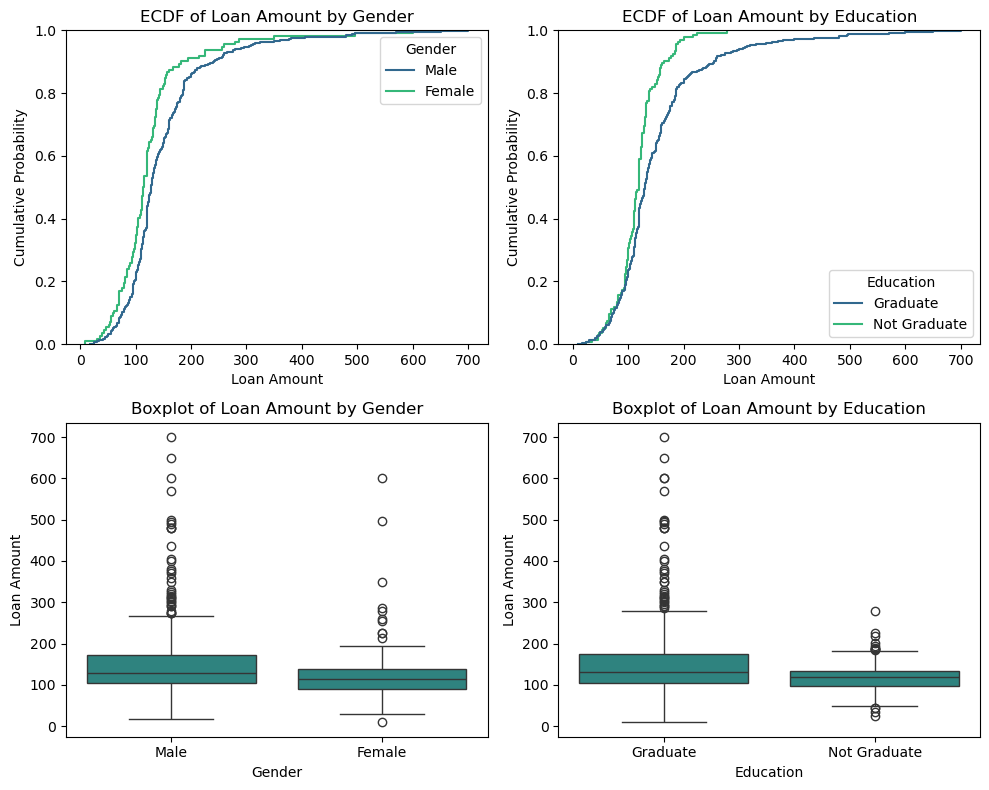

In [26]:
# How abourt the loan amount, who asks for more loans, men, women,graduates or not?
column = ['Gender', 'Education']
# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
# Flatten the axes array for easy iteration
axes = axes.flatten()
# Loop through each column and plot the corresponding ECDF and boxplot
for i, col in enumerate(column):
    # Plot the ECDF
    plt.subplot(2, 2, i + 1)  # Adjust the subplot index for the ECDF
    sns.ecdfplot(data=train_df, x='LoanAmount', hue=col, palette='viridis')
    axes[i].set_title(f'ECDF of Loan Amount by {col}')
    axes[i].set_xlabel('Loan Amount')
    axes[i].set_ylabel('Cumulative Probability')
    
    # Plot the boxplot
    plt.subplot(2, 2, i + 3)  # Adjust the subplot index for the boxplot
    sns.boxplot(data=train_df, x=col, y='LoanAmount', palette='viridis', hue=False, legend=False)
    plt.title(f'Boxplot of Loan Amount by {col}')
    plt.xlabel(col)
    plt.ylabel('Loan Amount')
plt.tight_layout()
plt.show()

- There's a **high difference between loan amounts for men and women.**
- The **average loan amount for men is higher than for women.**
- There are a lot of outliers in the men's data, their 75th percentile is higher than women's and by the large gap in the Loan Amount distribution curve, we can infer **that men tend to ask for bigger loans**, manybe due to their income being higher maybe due to their co-applicants income being higher.
- As you can see, **graduated people tend to ask for bigger loans**, maybe due to the fact that they have a bigger income and often have co-applicants.

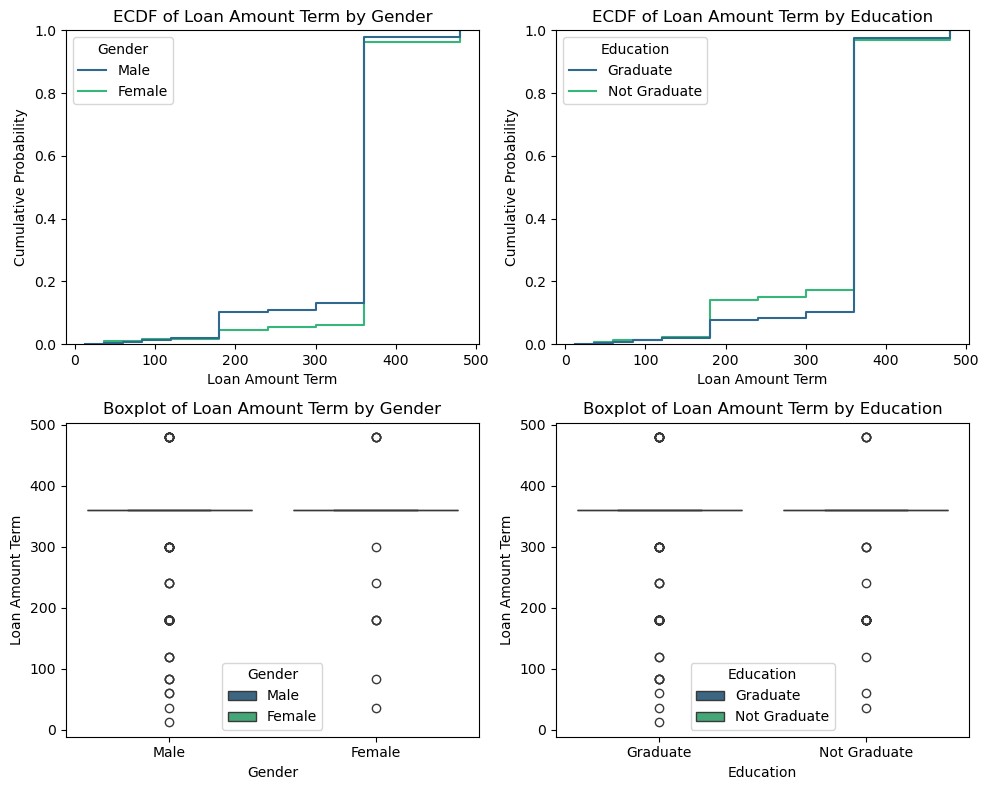

In [27]:
# And how many months to pay the loan?
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
# Flatten the axes array for easy iteration
axes = axes.flatten()
columns = ['Gender','Education']
# Loop through each column and plot the corresponding ECDF and boxplot
for i, column in enumerate(columns):
    # ECDF plot
    plt.subplot(2, 2, i + 1)  # Adjust the subplot index for the ECDF
    sns.ecdfplot(data=train_df, x='Loan_Amount_Term', hue=column, palette='viridis')
    axes[i].set_title(f'ECDF of Loan Amount Term by {column}')
    axes[i].set_xlabel('Loan Amount Term')
    axes[i].set_ylabel('Cumulative Probability')
    
    # Boxplot
    plt.subplot(2, 2, i + 3)  # Adjust the subplot index for the boxplot
    sns.boxplot(data=train_df, x=column, y='Loan_Amount_Term', palette='viridis',hue=column, legend=True)
    plt.title(f'Boxplot of Loan Amount Term by {column}')
    plt.xlabel(column)
    plt.ylabel('Loan Amount Term')
plt.tight_layout()
plt.show()


- **89% of the women pay in less than 360 months** and 2.7% pay in less than 180 months which corroborates the fact they tend to ask for smaller loans;
- **84% of the men pay in less than 360 months** and 8.3% pay in less than 180 months;
- **87% of the graduated pay in less than 360 months** and 5.9% pay in less than 180 months;
- **Only 78% of the graduates paid in less than 360 months** and 12.5% paid in less than 180 months, which corroborates the fact that the Graduated tend to ask for bigger loans. Not Graduated people tend to ask for smaller loans, and need a smaller time to pay them.

### **Aproval Rate over Categories**

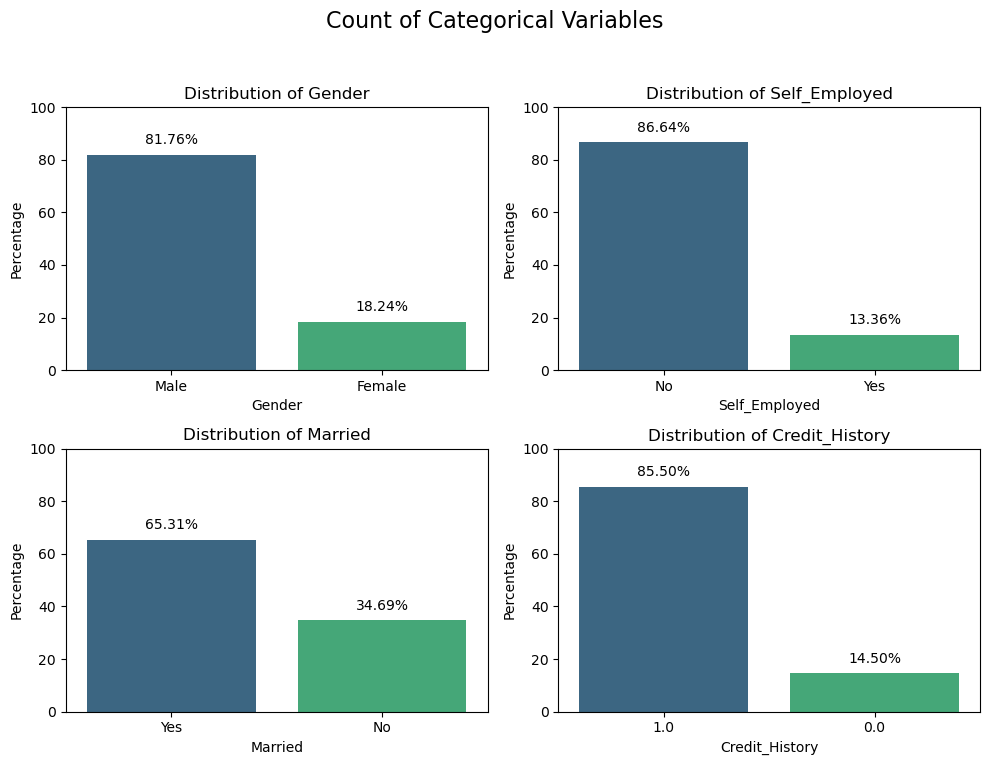

In [28]:
# but is Gender mandatory for the Loan Approval?
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
# Flatten the axes array for easy iteration
axes = axes.flatten()

columns = ['Gender', 'Self_Employed', 'Married','Credit_History']
# Loop through each column and plot the corresponding ECDF and boxplot
for i, column in enumerate(columns):  
    percentages = train_df[column].value_counts(normalize=True) * 100 
    # Bar plot
    plt.subplot(2, 2, i + 1)  # Adjust the subplot index for the bar plot
    sns.barplot(x=percentages.index.astype(str), y=percentages.values, ax=axes[i], palette='viridis', hue=percentages.index.astype(str))    
    # Set title and labels
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Percentage')
    axes[i].set_ylim(0, 100)  # Set y-axis limit to 0-100%
    # Set x-ticks to be the range of the number of categories
    axes[i].set_xticks(np.arange(len(percentages.index)))
    axes[i].set_xticklabels(percentages.index, rotation=0)
    # Add value labels on top of the bars
    for p in axes[i].patches:
        height = p.get_height()
        axes[i].text(p.get_x() + p.get_width()/2, height + 3, f'{height:.2f}%', 
                     ha='center', va='bottom', fontsize=10)

# Set a common title for the entire figure
plt.suptitle('Count of Categorical Variables', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
plt.show()

    


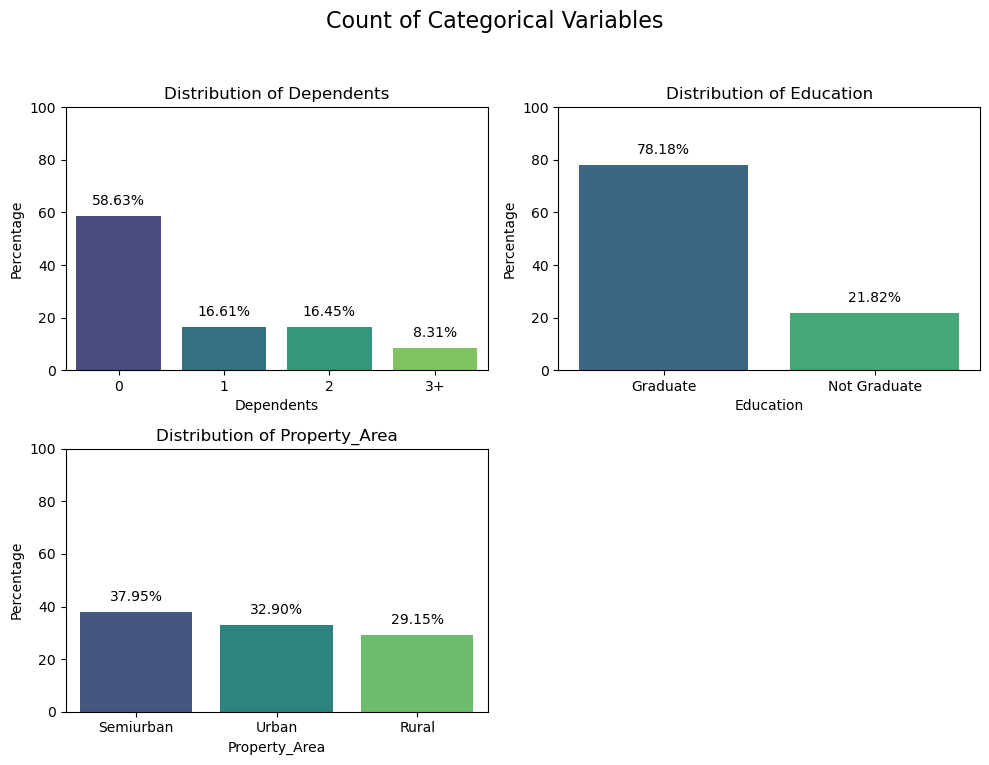

In [29]:
# How about the number of dependents, Education level  and Property_Area?
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
# Flatten the axes array for easy iteration
axes = axes.flatten()

columns = ['Dependents', 'Education', 'Property_Area']
# Loop through each column and plot the corresponding ECDF and boxplot
for i, column in enumerate(columns):  
    percentages = train_df[column].value_counts(normalize=True) * 100 
    # Bar plot
    plt.subplot(2, 2, i + 1)  # Adjust the subplot index for the bar plot
    sns.barplot(x=percentages.index.astype(str), y=percentages.values, ax=axes[i], palette='viridis', hue=percentages.index.astype(str))    
    # Set title and labels
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Percentage')
    axes[i].set_ylim(0, 100)  # Set y-axis limit to 0-100%
    # Set x-ticks to be the range of the number of categories
    axes[i].set_xticks(np.arange(len(percentages.index)))
    axes[i].set_xticklabels(percentages.index, rotation=0)
    # Add value labels on top of the bars
    for p in axes[i].patches:
        height = p.get_height()
        axes[i].text(p.get_x() + p.get_width()/2, height + 3, f'{height:.2f}%', 
                     ha='center', va='bottom', fontsize=10)

# Set a common title for the entire figure
plt.suptitle('Count of Categorical Variables', fontsize=16)
plt.delaxes(axes[3])  # Remove the last subplot (4th one) since we have only 3 categories   
# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
plt.show()
   
    


**3 Correlationships**

In [30]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Create a copy of the DataFrame to avoid modifying the original
train_df_encoded = train_df.copy()
# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Apply LabelEncoder to categorical columns
for column in train_df_encoded.columns:
    if train_df_encoded[column].dtype == 'object':
        train_df_encoded[column] = label_encoder.fit_transform(train_df_encoded[column])
# Check the first few rows of the encoded DataFrame
train_df_encoded.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


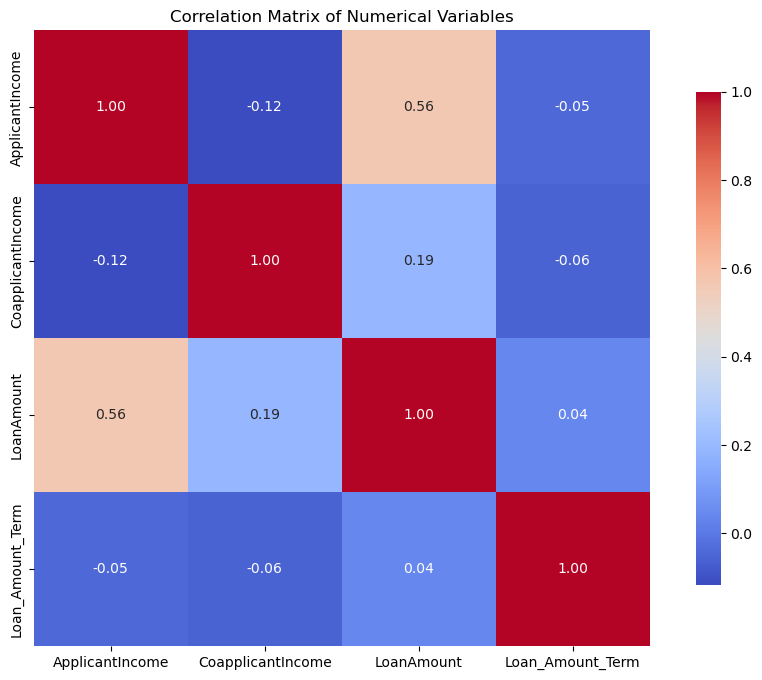

In [31]:
# Correlation matrix btween numerical variables
plt.figure(figsize=(12, 8))
plt.title('Correlation Matrix of Numerical Variables')
# Calculate the correlation matrix
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
# Select only the numerical columns for correlation analysis
corr_matrix = train_df[num_cols].corr()
# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.show()


In [32]:
# Convert categorical variables to numerical using map do separate columns
for col in categorical_cols:
    train_df[col] = train_df[col].map({val: i for i, val in enumerate(train_df[col].unique())})
# Check the first few rows of the encoded DataFrame
print(train_df.head())



   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       0        0           0          0              0             5849   
1       0        1           1          0              0             4583   
2       0        1           0          0              1             3000   
3       0        1           0          1              0             2583   
4       0        0           0          0              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       120.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   Property_Area  Loan_Status  
0              0            0  
1              1            1  
2              0    

In [33]:
test_df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [34]:
# Convert categorical variables to numerical using map do separate columns
test_categorical_cols = test_df.select_dtypes(include=['object']).columns
# Convert categorical variables to numerical using map do separate columns
for col in test_categorical_cols:
    test_df[col] = test_df[col].map({val: i for i, val in enumerate(test_df[col].unique())})
# Check the first few rows of the encoded DataFrame
print(test_df.head())

   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       0        0           0          0              0             5720   
1       0        0           1          0              0             3076   
2       0        0           2          0              0             5000   
3       0        0           2          0              0             2340   
4       0        1           0          1              0             3276   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                  0       110.0             360.0             1.0   
1               1500       126.0             360.0             1.0   
2               1800       208.0             360.0             1.0   
3               2546       100.0             360.0             1.0   
4                  0        78.0             360.0             1.0   

   Property_Area  
0              0  
1              0  
2              0  
3              0  
4              0  


**Hypothisis testing**

- The null hypothesis is that the mean of the population is equal to the known value, i.e.
\[H_{0}:\mu=\mu_{0}\]
- The alternative hypothesis is that the mean of the population is not equal to the known value, i.
\[H_{1}:\mu\neq\mu_{0}\]

In [40]:
# hypothesis testing
from scipy import stats
# Perform t-test for ApplicantIncome by Loan_Status and Gender, Education, self_employed, married, credit_history
# For categorical variables, we will use the t-test to compare means
# where H0: The approval rate is independent of the categorical variable
# H1: The approval rate is dependent on the categorical variable
# y=0, n=1
# Perform t-test for ApplicantIncome by Loan_Status
# Separate the data into two groups based on Loan_Status
Columns=['Gender', 'Self_Employed', 'Married','Credit_History']
for column in Columns:
    # Perform t-test for ApplicantIncome by Loan_Status and column
    t_stat, p_val = stats.ttest_ind(train_df.loc[train_df['Loan_Status'] ==1, 'ApplicantIncome'], train_df.loc[train_df[column] == 1, 'ApplicantIncome'])
    # Check if p-value is less than 0.05 (significance level)
    if p_val < 0.05:
        print(f"H0: The approval rate is dependent on {column}.\n Reject H0.(p-value = {p_val:.4f})")
    else:
        print(f"H0: The approval rate is independent of {column}:\n Fail to reject H0.(p-value = {p_val:.4f})")
    

H0: The approval rate is independent of Gender:
 Fail to reject H0.(p-value = 0.2489)
H0: The approval rate is dependent on Self_Employed.
 Reject H0.(p-value = 0.0261)
H0: The approval rate is independent of Married:
 Fail to reject H0.(p-value = 0.7577)
H0: The approval rate is independent of Credit_History:
 Fail to reject H0.(p-value = 0.8553)


In [43]:
# For columns Dependents, Education, Property_Area
# Perform t-test for ApplicantIncome by Loan_Status and column
columns=['Dependents', 'Education', 'Property_Area']
for column in columns:
    # Perform t-test for ApplicantIncome by Loan_Status and column
    t_stat, p_val = stats.ttest_ind(train_df.loc[train_df['Loan_Status'] == 1, column], train_df.loc[train_df['Loan_Status'] == 0, column])
    # Check if p-value is less than 0.05 (significance level)
    if p_val < 0.05:
        print(f"H0: The approval rate is dependent on {column}.\n Reject H0.(p-value = {p_val:.4f})")
    else:
        print(f"H0: The approval rate is independent of {column}:\n Fail to reject H0.(p-value = {p_val:.4f})")


H0: The approval rate is independent of Dependents:
 Fail to reject H0.(p-value = 0.8024)
H0: The approval rate is dependent on Education.
 Reject H0.(p-value = 0.0334)
H0: The approval rate is dependent on Property_Area.
 Reject H0.(p-value = 0.0105)


In [41]:
# For columns ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term
# Perform t-test for ApplicantIncome by Loan_Status
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for column in num_cols:
    # Perform t-test for ApplicantIncome by Loan_Status and column
    t_stat, p_val = stats.ttest_ind(train_df.loc[train_df['Loan_Status'] == 1, column], train_df.loc[train_df['Loan_Status'] == 0, column])
    # Check if p-value is less than 0.05 (significance level)
    if p_val < 0.05:
        print(f"H0: The approval rate is dependent on {column}.\n Reject H0.(p-value = {p_val:.4f})")
    else:
        print(f"H0: The approval rate is independent of {column}:\n Fail to reject H0.(p-value = {p_val:.4f})")

H0: The approval rate is independent of ApplicantIncome:
 Fail to reject H0.(p-value = 0.9073)
H0: The approval rate is independent of CoapplicantIncome:
 Fail to reject H0.(p-value = 0.1429)
H0: The approval rate is independent of LoanAmount:
 Fail to reject H0.(p-value = 0.4314)
H0: The approval rate is independent of Loan_Amount_Term:
 Fail to reject H0.(p-value = 0.5771)


# Dealing with Outliers

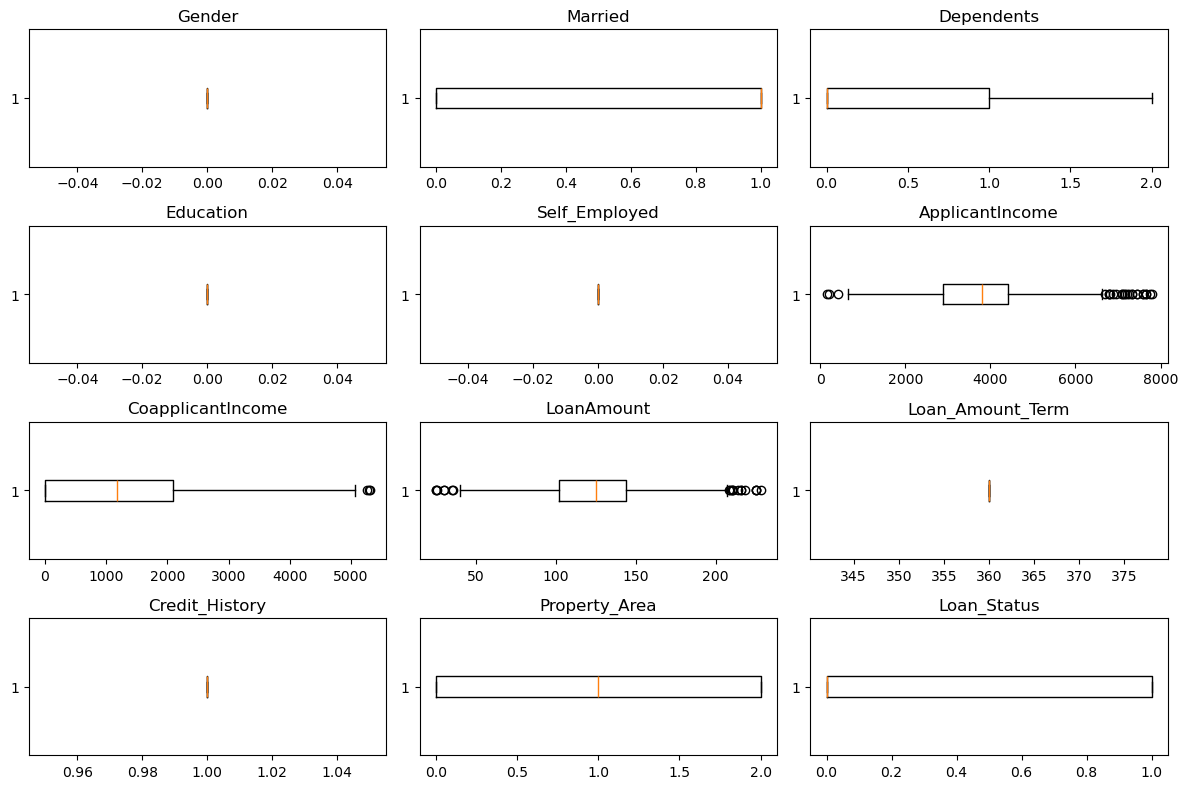

In [46]:
# Deal with outliers
# For All columns and fill with significant outliers
for col in train_df.columns:
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Replace outliers with the median value of the column
    train_df[col] = np.where(train_df[col] < lower_bound, train_df[col].median(), train_df[col])
    train_df[col] = np.where(train_df[col] > upper_bound, train_df[col].median(), train_df[col])
# Check for outliers in the dataset
plt.figure(figsize=(12, 8))
for col in train_df.columns:
    plt.subplot(4, 3, train_df.columns.get_loc(col) + 1)
    plt.boxplot(train_df[col], vert=False)
    plt.title(col)
plt.tight_layout()
plt.show()

## Normalization

In [47]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit the scaler to the data and transform it
train_df_scaled = scaler.fit_transform(train_df)
# Convert the scaled data back to a DataFrame
train_df_scaled = pd.DataFrame(train_df_scaled, columns=train_df.columns)
# Check the first few rows of the scaled DataFrame
train_df_scaled.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,-1.372089,-0.650697,0.0,0.0,1.516319,-0.907382,-0.107351,0.0,0.0,-1.250298,-0.674519
1,0.0,0.728816,0.663539,0.0,0.0,0.585197,0.200120,0.103319,0.0,0.0,-0.060092,1.482537
2,0.0,0.728816,-0.650697,0.0,0.0,-0.579074,-0.907382,-1.529369,0.0,0.0,-1.250298,-0.674519
3,0.0,0.728816,-0.650697,0.0,0.0,-0.885771,0.824375,-0.107351,0.0,0.0,-1.250298,-0.674519
4,0.0,-1.372089,-0.650697,0.0,0.0,1.627377,-0.907382,0.445657,0.0,0.0,-1.250298,-0.674519


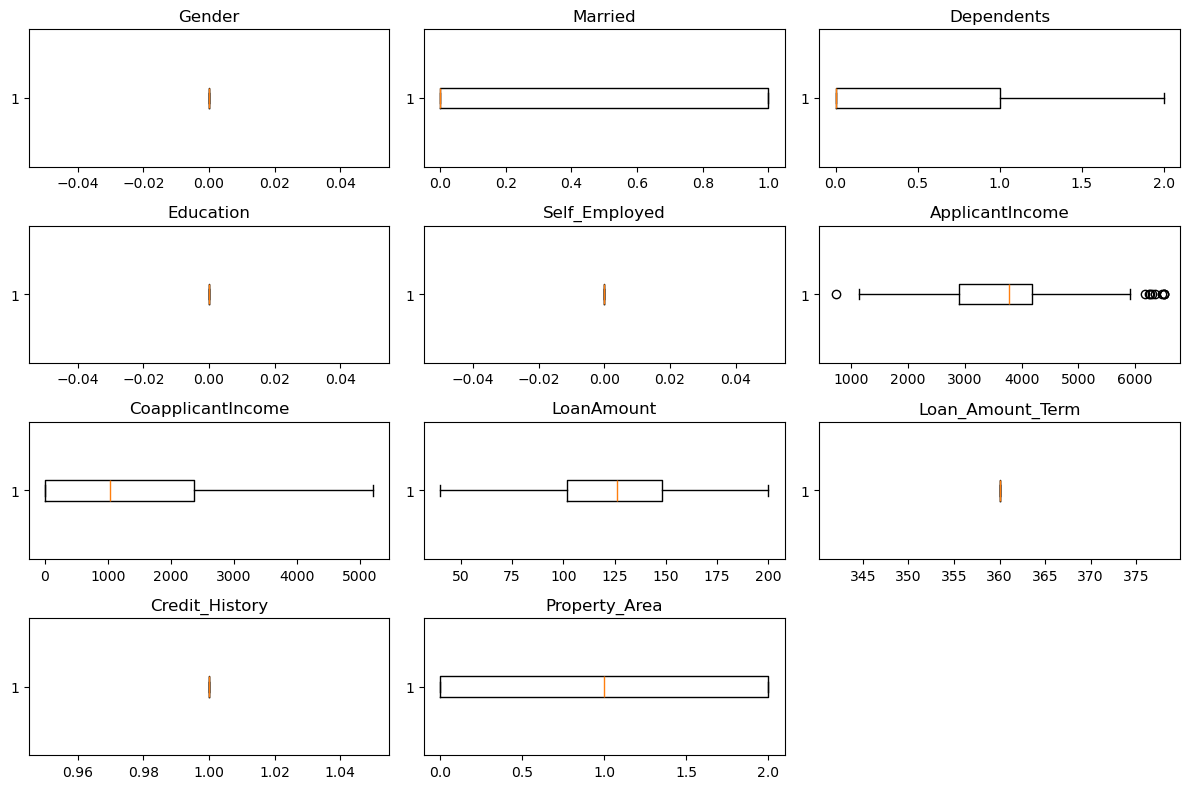

In [49]:
# test data outliers
# For All columns and fill with significant outliers
for col in test_df.columns:
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Replace outliers with the median value of the column
    test_df[col] = np.where(test_df[col] < lower_bound, test_df[col].median(), test_df[col])
    test_df[col] = np.where(test_df[col] > upper_bound, test_df[col].median(), test_df[col])
# Check for outliers in the dataset
plt.figure(figsize=(12, 8))
for col in test_df.columns:
    plt.subplot(4, 3, test_df.columns.get_loc(col) + 1)
    plt.boxplot(test_df[col], vert=False)
    plt.title(col)
plt.tight_layout()
plt.show()

## Model Development

In [ ]:
# split the data into features and target variable
X = train_df.drop(columns=['Loan_Status'])
y = train_df['Loan_Status']
# split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Check the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# Check the first few rows of the training set
X_train.head(), y_train.head()




(     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
 83      0.0      1.0         0.0        0.0            0.0           6000.0   
 90      0.0      1.0         0.0        0.0            0.0           2958.0   
 227     0.0      1.0         2.0        0.0            0.0           6250.0   
 482     0.0      1.0         0.0        0.0            0.0           2083.0   
 464     0.0      0.0         0.0        0.0            0.0           4166.0   
 
      CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
 83              2250.0       125.0             360.0             1.0   
 90              2900.0       131.0             360.0             1.0   
 227             1695.0       210.0             360.0             1.0   
 482             3150.0       128.0             360.0             1.0   
 464                0.0        98.0             360.0             1.0   
 
      Property_Area  
 83             2.0  
 90             2.0  
 227        

### Logistic Regression


In [56]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Initialize the Logistic Regression model
LR = LogisticRegression(solver='liblinear', random_state=42,class_weight='balanced' )
LR.fit(X_train, y_train)

y_predict = LR.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
LR_SC = accuracy_score(y_predict,y_test)
print('accuracy is',accuracy_score(y_predict,y_test))


              precision    recall  f1-score   support

         0.0       0.63      0.54      0.58        80
         1.0       0.33      0.42      0.37        43

    accuracy                           0.50       123
   macro avg       0.48      0.48      0.47       123
weighted avg       0.53      0.50      0.51       123

accuracy is 0.4959349593495935


Confusion Matrix is : 
 [[43 37]
 [25 18]]


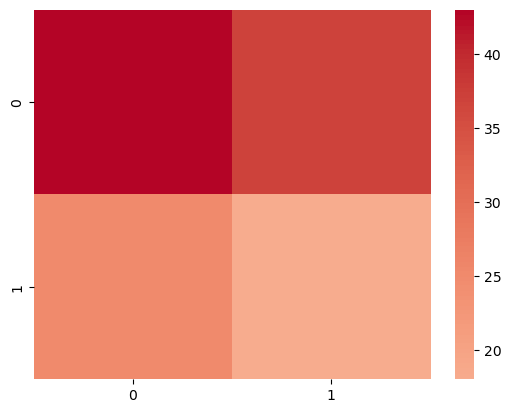

In [57]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_predict)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True,cmap='coolwarm')
plt.show()

In [58]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Create an instance of the RandomOverSampler
oversampler = RandomOverSampler(random_state=1)

# Apply oversampling to the training data
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Create an instance of LogisticRegression
LR = LogisticRegression(solver='liblinear', random_state=1,class_weight='balanced')

# Fit the logistic regression model on the resampled data
LR.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_predict = LR.predict(X_test)

# Print classification report
print(classification_report(y_test, y_predict))

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_predict)
print('Accuracy:', accuracy)

              precision    recall  f1-score   support

         0.0       0.64      0.55      0.59        80
         1.0       0.33      0.42      0.37        43

    accuracy                           0.50       123
   macro avg       0.49      0.48      0.48       123
weighted avg       0.53      0.50      0.51       123

Accuracy: 0.5040650406504065


In [59]:
Logistic_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Logistic_Regression.head(5)

,y_test,prediction
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,1.0
4,0.0,0.0


## Adjusted Logistic Regression

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create a Logistic Regression classifier
LRclassifier = LogisticRegression()

# Define the parameter grid to search
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=LRclassifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create a new Logistic Regression classifier with the best parameters
LRclassifier_best = LogisticRegression(**best_params, class_weight='balanced')

# Fit the classifier to the training data
LRclassifier_best.fit(X_train, y_train)

# Make predictions on the test data
y_pred = LRclassifier_best.predict(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

c:\Users\kanch\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\kanch\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

              precision    recall  f1-score   support

         0.0       0.64      0.56      0.60        80
         1.0       0.34      0.42      0.38        43

    accuracy                           0.51       123
   macro avg       0.49      0.49      0.49       123
weighted avg       0.54      0.51      0.52       123

[[45 35]
 [25 18]]


c:\Users\kanch\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\kanch\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
T

In [61]:
accuracy

0.5121951219512195

# SVC

In [62]:
#Support Vector Classifier 
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

SVCclassifier = SVC(kernel='rbf', max_iter=1000,class_weight='balanced')
SVCclassifier.fit(X_train, y_train)


y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)

              precision    recall  f1-score   support

         0.0       0.63      0.66      0.65        80
         1.0       0.31      0.28      0.29        43

    accuracy                           0.53       123
   macro avg       0.47      0.47      0.47       123
weighted avg       0.52      0.53      0.52       123

[[53 27]
 [31 12]]


In [63]:
SVCAcc

0.5284552845528455

# Random Fores Classifier

Accuracy: 0.62
              precision    recall  f1-score   support

         0.0       0.65      0.89      0.75        80
         1.0       0.36      0.12      0.18        43

    accuracy                           0.62       123
   macro avg       0.50      0.50      0.46       123
weighted avg       0.55      0.62      0.55       123



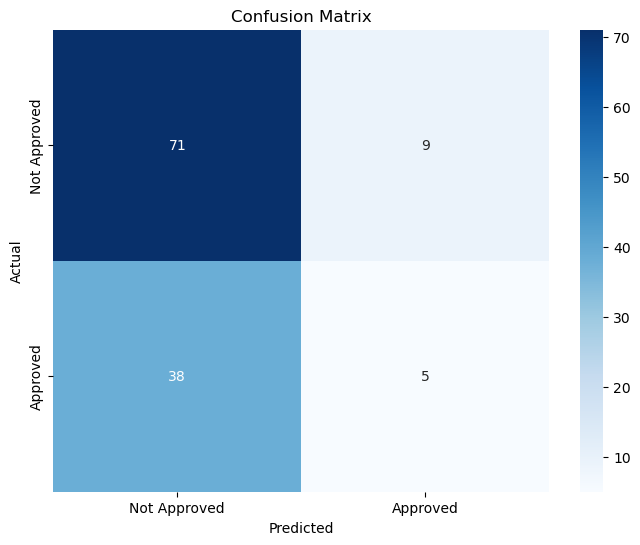

In [53]:
# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
# Make predictions on the test set
y_pred = rf.predict(X_test)
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
# Print classification report
print(classification_report(y_test, y_pred))
# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

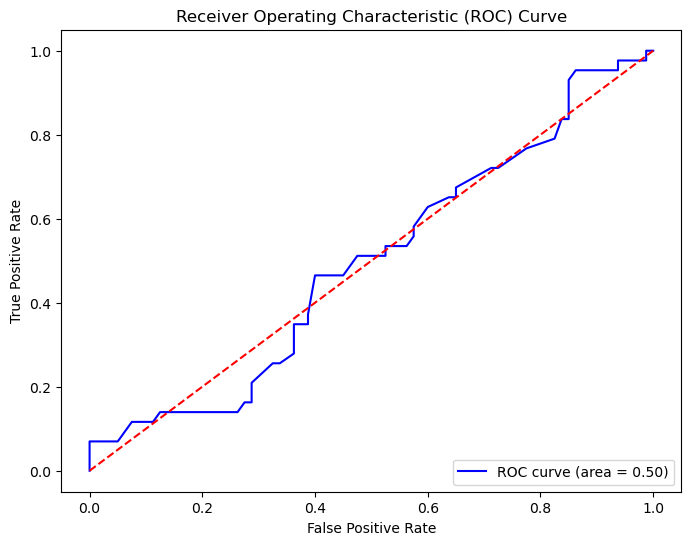

In [54]:
# Droaw curves
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
# Calculate ROC curve and AUC
y_pred_proba = rf.predict_proba(X_test)[:, 1]
y_test = y_test.values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## XGboost

In [68]:
# xgboost
# imoport xgboost
import xgboost 
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create an XGBoost classifier
XGBclassifier = XGBClassifier()

# Fit the classifier to the training data
XGBclassifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = XGBclassifier.predict(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Calculate accuracy
XGBacc = accuracy_score(y_pred, y_test)

              precision    recall  f1-score   support

         0.0       0.65      0.81      0.72        80
         1.0       0.35      0.19      0.24        43

    accuracy                           0.59       123
   macro avg       0.50      0.50      0.48       123
weighted avg       0.54      0.59      0.55       123

[[65 15]
 [35  8]]


In [69]:
XGBacc

0.5934959349593496

Confusion Matrix is : 
 [[44 36]
 [25 18]]


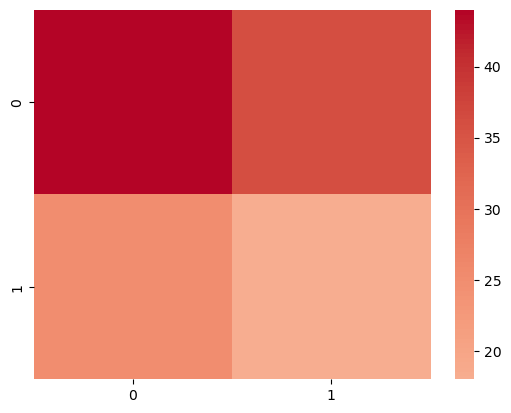

In [70]:

#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_predict)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True,cmap='coolwarm')
plt.show()

In [71]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


XGBclassifier = XGBClassifier()

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [3, 4, 5],  # Maximum depth of each tree
    'learning_rate': [0.1, 0.01, 0.001]  # Learning rate
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=XGBclassifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create a new XGBoost classifier with the best parameters
XGBclassifier_best = XGBClassifier(**best_params)

# Fit the classifier to the training data
XGBclassifier_best.fit(X_train, y_train)

# Make predictions on the test data
y_pred = XGBclassifier_best.predict(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy 

              precision    recall  f1-score   support

         0.0       0.65      1.00      0.79        80
         1.0       0.00      0.00      0.00        43

    accuracy                           0.65       123
   macro avg       0.33      0.50      0.39       123
weighted avg       0.42      0.65      0.51       123

[[80  0]
 [43  0]]


c:\Users\kanch\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kanch\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kanch\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.6504065040650406